In [4]:
# from methods import OA_SA, VA_SA
import numpy as np
from envs import DynamicQVRPEnv
from methods import Agent, GreedyAgent, MSAAgent, OfflineAgent
from experiments import run_agent
import matplotlib.pyplot as plt

In [2]:
env_configs = {
        "K" : 50,
        "Q" : 100, 
        "DoD" : 0.5,
        "vehicle_capacity" : 25,
        "re_optimization" : False,
        "costs_KM" : [1, 1],
        "emissions_KM" : [.1, .3]
    }

In [3]:
r_offline_woRO, *_ = run_agent(
    OfflineAgent,
    env_configs
)

100%|██████████| 10/10 [00:02<00:00,  3.48it/s]


In [5]:
r_greedy_woRO, *_ = run_agent(
    GreedyAgent,
    env_configs
)

100%|██████████| 10/10 [00:00<00:00, 30.37it/s]


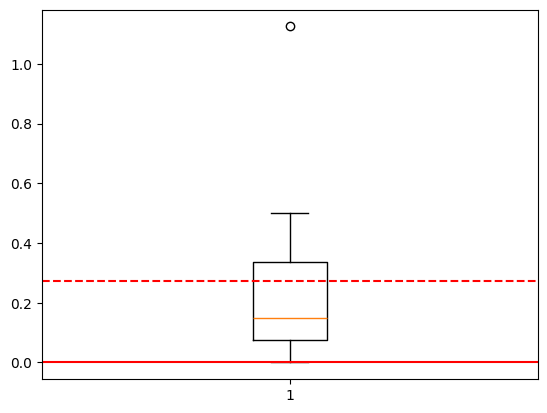

In [21]:
plt.boxplot(r_offline_woRO/r_greedy_woRO-1)
plt.hlines(0, 0.5, 1.5, colors='red')
plt.hlines(np.mean(r_offline_woRO/r_greedy_woRO-1), 0.5, 1.5, colors='red', linestyles='--')

In [7]:
r_MSA_woRO, *_ = run_agent(
    MSAAgent,
    env_configs,
    dict(n_sample=13)
)

100%|██████████| 10/10 [01:31<00:00,  9.15s/it]


Text(0.5, 1.0, 'offline/online gap')

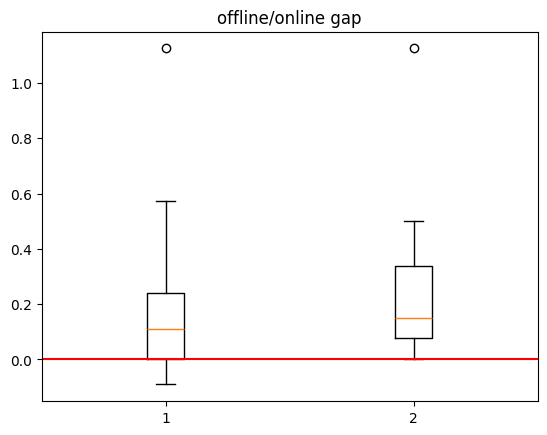

In [22]:
plt.boxplot([r_offline_woRO/r_MSA_woRO -1, r_offline_woRO/r_greedy_woRO-1])
plt.hlines(0, 0.5, 2.5, colors='red')
plt.title("offline/online gap")
# plt.hlines(np.mean(r_MSA_woRO/r_offline_woRO), 0.5, 2.5, colors='red', linestyles='--')

In [9]:
r_MSA_woRO/r_offline_woRO

array([0.47058824, 0.63636364, 1.        , 1.        , 1.08333333,
       0.78571429, 0.875     , 0.89473684, 1.1       , 0.90909091])

In [3]:
env = DynamicQVRPEnv(50, 100, DoD=0.5, vehicle_capacity=25, re_optimization=True,
                     costs_KM=[1, 1], emissions_KM=[.1, .3]
)
agent = GreedyAgent(env)
r_wRO, *_ = agent.run(10)

100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


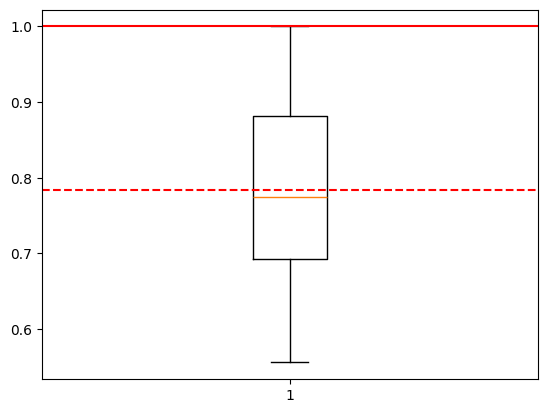

In [4]:
import matplotlib.pyplot as plt

plt.boxplot(r_woRO/r_wRO)
plt.hlines(1, 0.5, 1.5, colors='red')
plt.hlines(np.mean(r_woRO/r_wRO), 0.5, 1.5, colors='red', linestyles='--')

In [5]:
print(r_wRO)

[ 9. 14. 16. 15. 13. 19. 13. 16. 13.  9.]


[[ 0 22 23  5 24  9 20 11 19 26  4 10  6 13 18 15 12  1 25 17 14  3  7  2
  21  0  0]
 [ 0 16  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]]
[]
26
(2, 27)


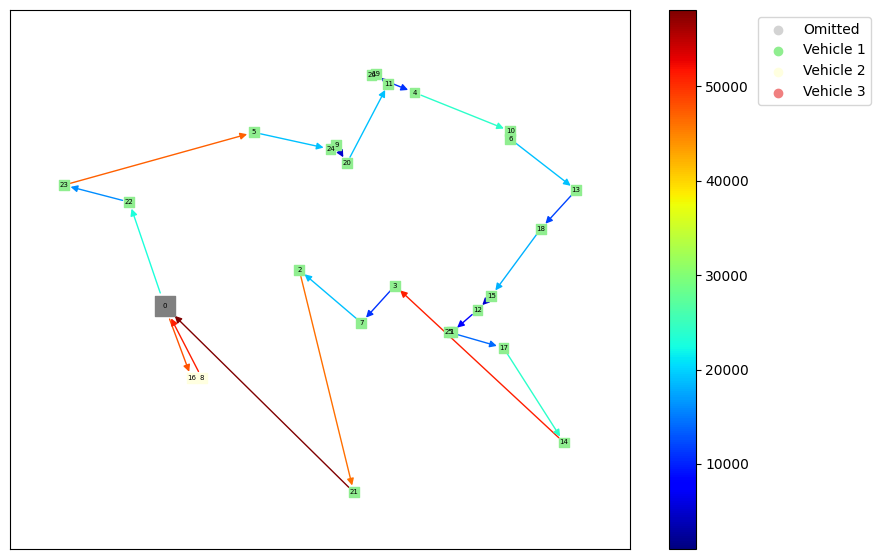

'\\documentclass{report}\n\\usepackage{tikz}\n\\usepackage{subcaption}\n\n\\begin{document}\n\\begin{figure}\n  \\begin{tikzpicture}\n      \\draw\n        (-1.173, 46.162) node[gray] (0){0}\n        (4.949, 45.702) node[lightgreen] (1){1}\n        (1.694, 46.803) node[lightgreen] (2){2}\n        (3.736, 46.523) node[lightgreen] (3){3}\n        (4.153, 49.926) node[lightgreen] (4){4}\n        (0.726, 49.225) node[lightgreen] (5){5}\n        (6.196, 49.108) node[lightgreen] (6){6}\n        (3.019, 45.868) node[lightgreen] (7){7}\n        (-0.386, 44.901) node[lightyellow] (8){8}\n        (2.487, 49.0) node[lightgreen] (9){9}\n        (6.196, 49.247) node[lightgreen] (10){10}\n        (3.595, 50.082) node[lightgreen] (11){11}\n        (5.493, 46.093) node[lightgreen] (12){12}\n        (7.6, 48.208) node[lightgreen] (13){13}\n        (7.337, 43.758) node[lightgreen] (14){14}\n        (5.788, 46.339) node[lightgreen] (15){15}\n        (-0.6, 44.889) node[lightyellow] (16){16}\n        (6.0

In [4]:
env.step(1)
print(env.routes)
print(env.omitted)
print(env.j)
env.render()